<a href="https://colab.research.google.com/github/Muthu329/df_muthuraj/blob/main/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trader Behaviour vs Market Sentiment Analysis

# Task
Analyze the relationship between trading behavior (profitability, leverage, volume, frequency) and market sentiment (Fear & Greed Index) using the "historical_data.csv" and "fear_greed_index.csv" datasets to uncover hidden patterns and provide actionable insights.

## Data loading

### Subtask:
Load the `historical_data.csv` and `fear_greed_index.csv` datasets into pandas DataFrames.


**Reasoning**:
I will start by importing the pandas library and then loading the two CSV files into separate DataFrames as requested. Finally, I will display the first few rows and information of each DataFrame to understand their contents.



In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Update file paths to load from Google Drive
historical_data = pd.read_csv('/content/drive/MyDrive/historical_data.csv')
fear_greed_index = pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')

print("Historical Data:")
display(historical_data.head())
historical_data.info()

print("\nFear and Greed Index:")
display(fear_greed_index.head())
fear_greed_index.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Historical Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


**Reasoning**:
The previous attempt failed because the file 'historical_data.csv' was not found. I need to check the available files to determine the correct file path.



In [ ]:
#Describe the following
historical_data.describe()


,timestamp,value,date
count,2.644000e+03,2644.000000,2644
mean,1.631899e+09,46.981089,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.000000,2018-02-01 00:00:00
25%,1.574811e+09,28.000000,2019-11-26 18:00:00
50%,1.631900e+09,46.000000,2021-09-17 12:00:00
75%,1.688989e+09,66.000000,2023-07-10 06:00:00
max,1.746164e+09,95.000000,2025-05-02 00:00:00
std,6.597967e+07,21.827680,NaN


In [ ]:
#Describe the following
fear_greed_index.describe()

,timestamp,value,date
count,2.644000e+03,2644.000000,2644
mean,1.631899e+09,46.981089,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.000000,2018-02-01 00:00:00
25%,1.574811e+09,28.000000,2019-11-26 18:00:00
50%,1.631900e+09,46.000000,2021-09-17 12:00:00
75%,1.688989e+09,66.000000,2023-07-10 06:00:00
max,1.746164e+09,95.000000,2025-05-02 00:00:00
std,6.597967e+07,21.827680,NaN


In [ ]:
import os
print(os.listdir())

['.config', 'drive', 'sample_data']


## Data Cleaning

### Subtask:
Clean both DataFrames by converting date columns to datetime objects, handling missing values, and ensuring appropriate data types.

**Reasoning:**
I will now clean the loaded dataframes. This involves converting the relevant timestamp columns to datetime objects for proper time-series analysis and handling any missing values.

In [ ]:
# Convert 'Timestamp IST' in historical_data to datetime objects
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Convert 'date' in fear_greed_index to datetime objects
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'], errors='coerce')

# Drop rows with NaT (Not a Time) in the date columns that resulted from coercion
historical_data.dropna(subset=['Timestamp IST'], inplace=True)
fear_greed_index.dropna(subset=['date'], inplace=True)

# Display info to check data types and non-null counts after cleaning
print("Historical Data Info after Cleaning:")
historical_data.info()

print("\nFear and Greed Index Info after Cleaning:")
fear_greed_index.info()

Historical Data Info after Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               2112

## Feature Engineering

### Subtask:
Aggregate the trading data by date to calculate metrics like total PnL, average leverage, total volume, and trade count. Merge this aggregated data with the sentiment data based on the date.

**Reasoning:**
To aggregate the trading data by date, I will extract the date from the `Timestamp IST` column in `historical_data`. Then, I will group the data by date and calculate the total `Closed PnL`, mean of `Start Position` (as a proxy for average leverage, assuming higher start position implies higher leverage), sum of `Size USD` (for total volume), and count of trades. Finally, I will merge this aggregated trading data with the `fear_greed_index` DataFrame using the date column.

In [ ]:
# Extract date from 'Timestamp IST'
historical_data['Date'] = historical_data['Timestamp IST'].dt.date

# Aggregate historical data by date
aggregated_trading_data = historical_data.groupby('Date').agg(
    total_pnl=('Closed PnL', 'sum'),
    average_leverage=('Start Position', 'mean'), # Using Start Position as a proxy for leverage
    total_volume_usd=('Size USD', 'sum'),
    trade_count=('Order ID', 'count') # Count of orders as trade count
).reset_index()

# Convert 'Date' column to datetime in aggregated_trading_data for merging
aggregated_trading_data['Date'] = pd.to_datetime(aggregated_trading_data['Date'])


# Convert 'date' in fear_greed_index to datetime objects (already done in previous step, but good to be sure)
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'])

# Merge the aggregated trading data with the fear_greed_index data
merged_data = pd.merge(aggregated_trading_data, fear_greed_index, left_on='Date', right_on='date', how='inner')

# Drop the redundant 'date' column
merged_data.drop('date', axis=1, inplace=True)

# Display the merged data
print("Merged Data:")
display(merged_data.head())
merged_data.info()

Merged Data:


,Date,total_pnl,average_leverage,total_volume_usd,trade_count,timestamp,value,classification
0,2023-05-01,0.000000,0.091933,477.00,3,1682919000,63,Greed
1,2023-12-05,0.000000,2.513867,50005.83,9,1701754200,75,Extreme Greed
2,2023-12-14,-205.434737,-132.574302,113203.35,11,1702531800,72,Greed
3,2023-12-15,-24.632034,-2440.000000,10609.95,2,1702618200,70,Greed
4,2023-12-16,0.000000,12124.666667,15348.77,3,1702704600,67,Greed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              479 non-null    datetime64[ns]
 1   total_pnl         479 non-null    float64       
 2   average_leverage  479 non-null    float64       
 3   total_volume_usd  479 non-null    float64       
 4   trade_count       479 non-null    int64         
 5   timestamp         479 non-null    int64         
 6   value             479 non-null    int64         
 7   classification    479 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 30.1+ KB


## Exploratory Data Analysis (EDA)

### Subtask:
Perform exploratory data analysis to visualize the relationship between trading metrics and market sentiment using correlation matrices, boxplots, and time series plots.

**Reasoning:**
To perform the exploratory data analysis, I will use the `merged_data` DataFrame, which contains both the aggregated trading metrics and the Fear & Greed Index.

First, I'll calculate and display the correlation matrix between the numerical columns in `merged_data` to understand the linear relationships between the variables.

Next, I'll create boxplots to visualize how the distribution of `total_pnl`, `average_leverage`, `total_volume_usd`, and `trade_count` varies across the different `classification` categories of the Fear & Greed Index. This will help identify potential differences in trading behavior during different market sentiment phases.

Finally, I will generate time series plots to show the evolution of the `value` of the Fear & Greed Index and the `total_pnl`, `total_volume_usd`, and `trade_count` over time. This will allow us to observe trends and potential correlations between sentiment and trading activity over the entire period.

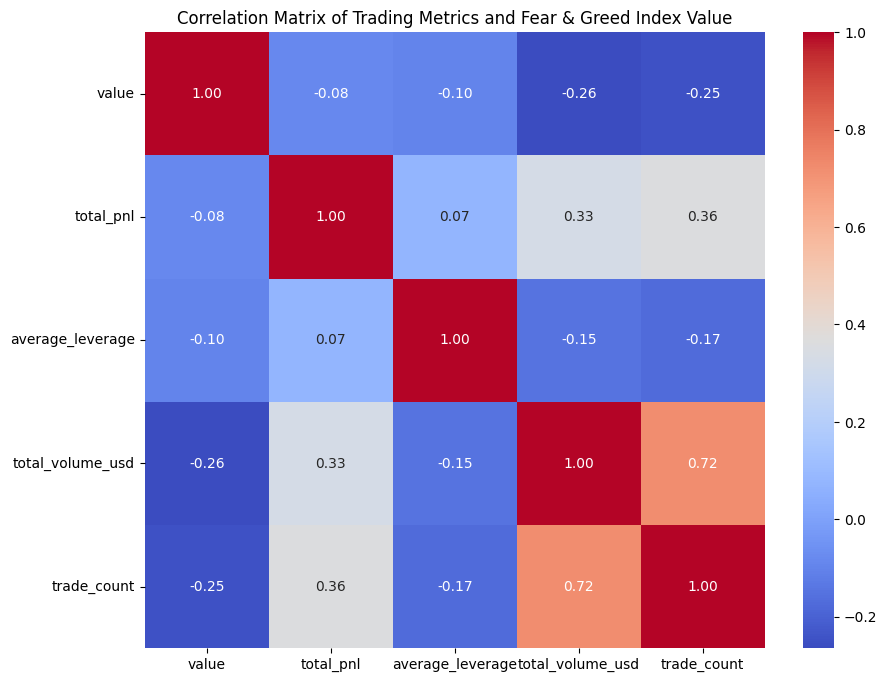

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = merged_data[['value', 'total_pnl', 'average_leverage', 'total_volume_usd', 'trade_count']].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trading Metrics and Fear & Greed Index Value')
plt.show()

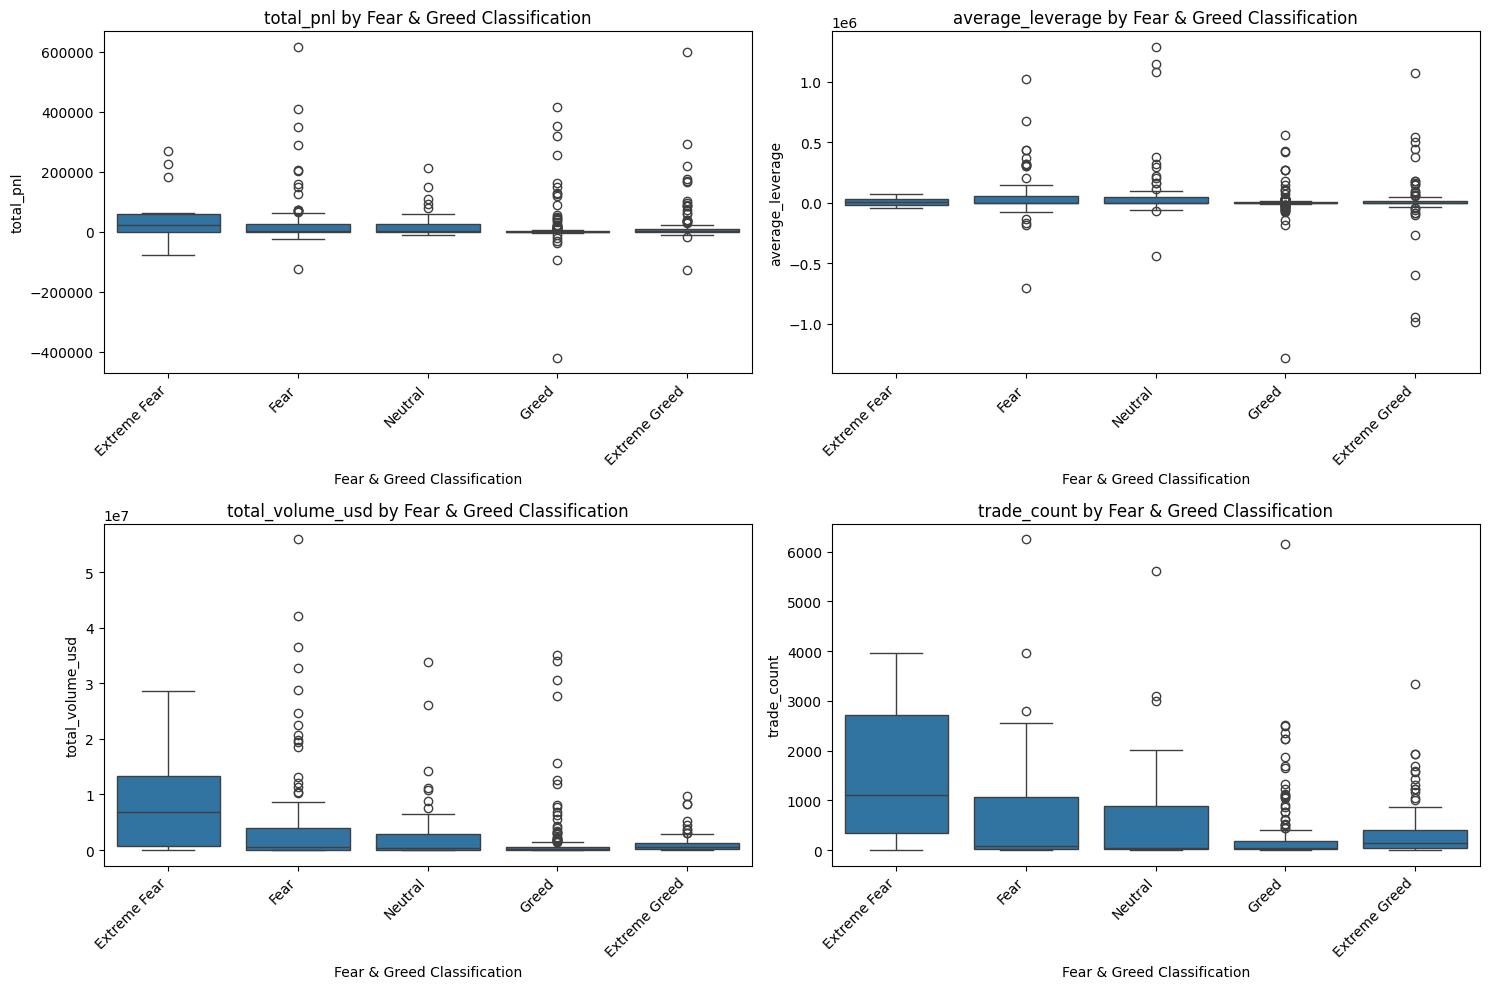

In [ ]:
# Create boxplots for trading metrics by sentiment classification

# Define the trading metrics to plot
trading_metrics = ['total_pnl', 'average_leverage', 'total_volume_usd', 'trade_count']

# Create boxplots for each metric
plt.figure(figsize=(15, 10))
for i, metric in enumerate(trading_metrics):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='classification', y=metric, data=merged_data, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
    plt.title(f'{metric} by Fear & Greed Classification')
    plt.xlabel('Fear & Greed Classification')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

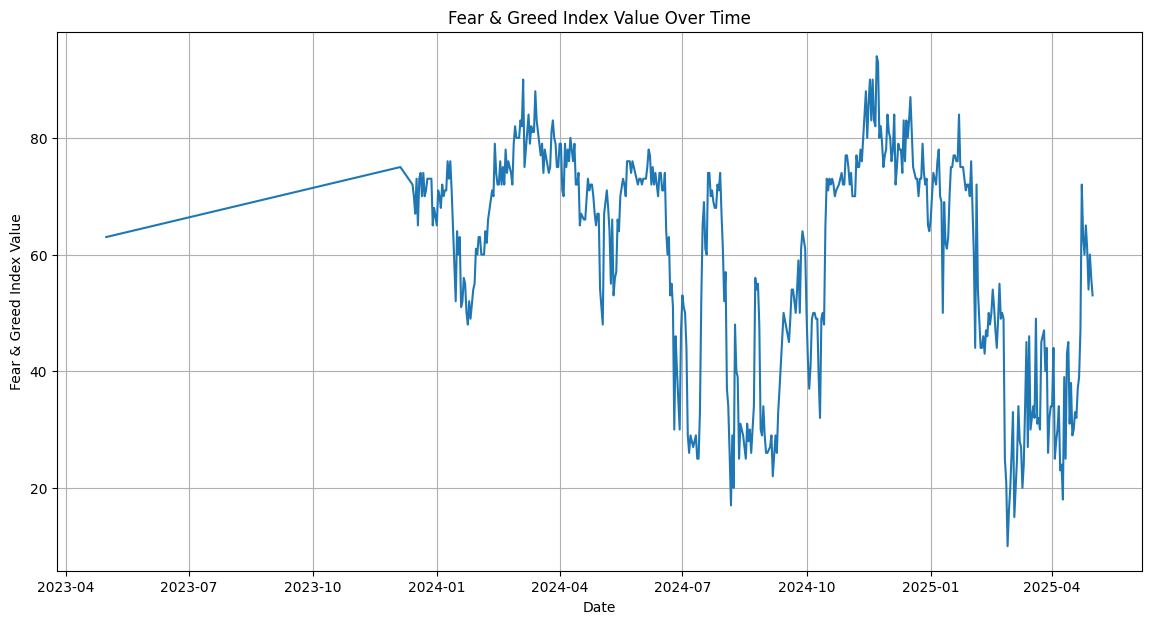

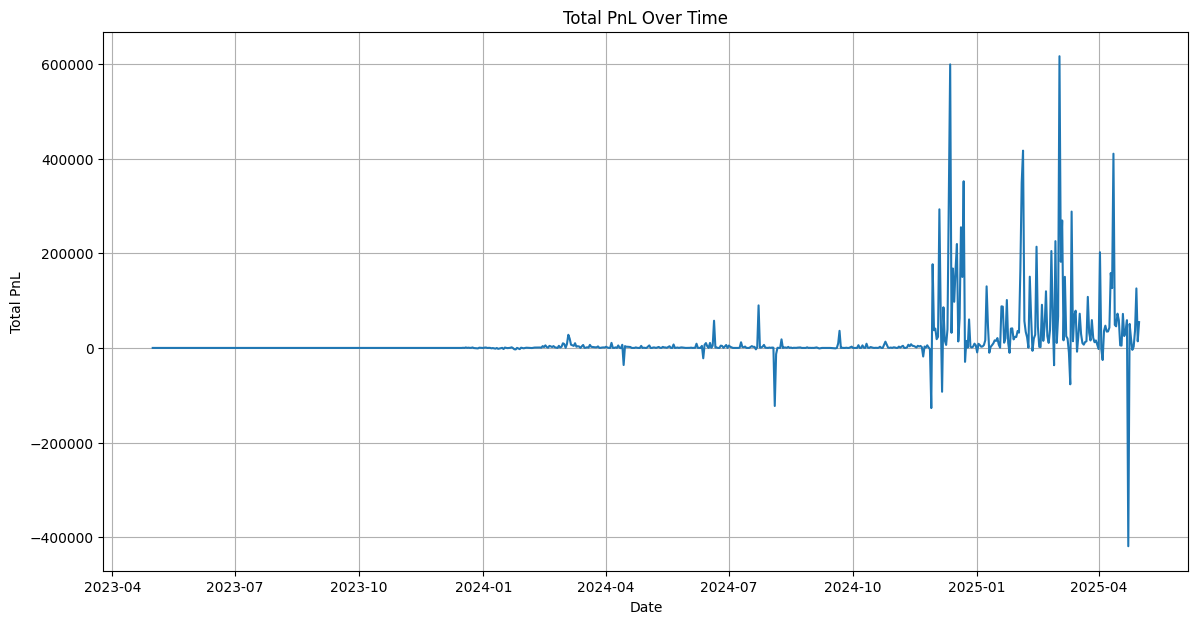

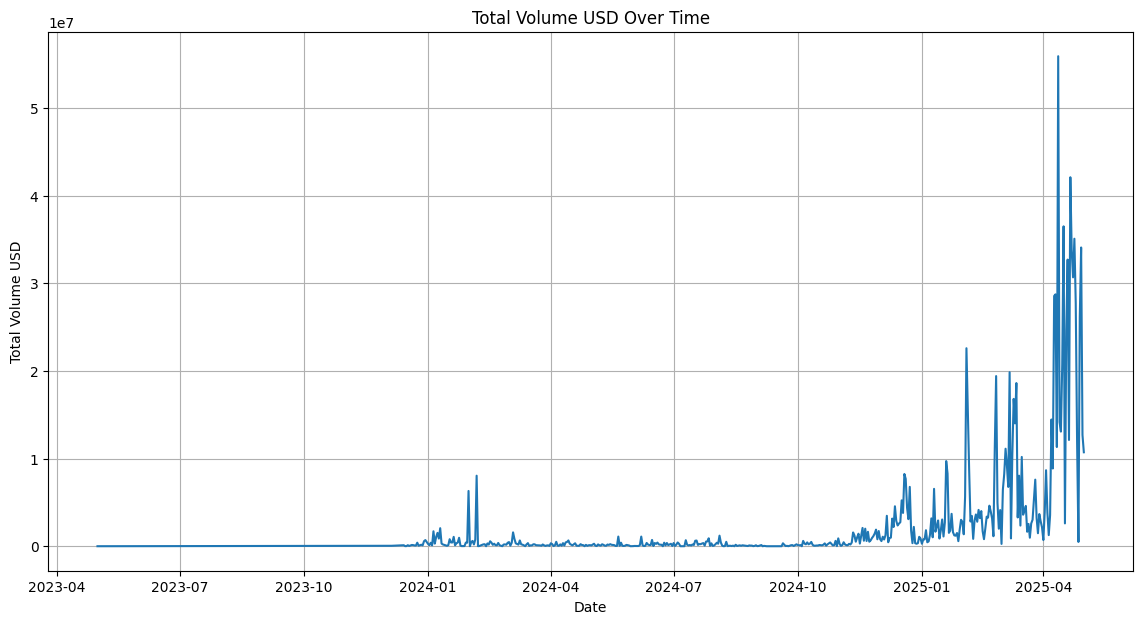

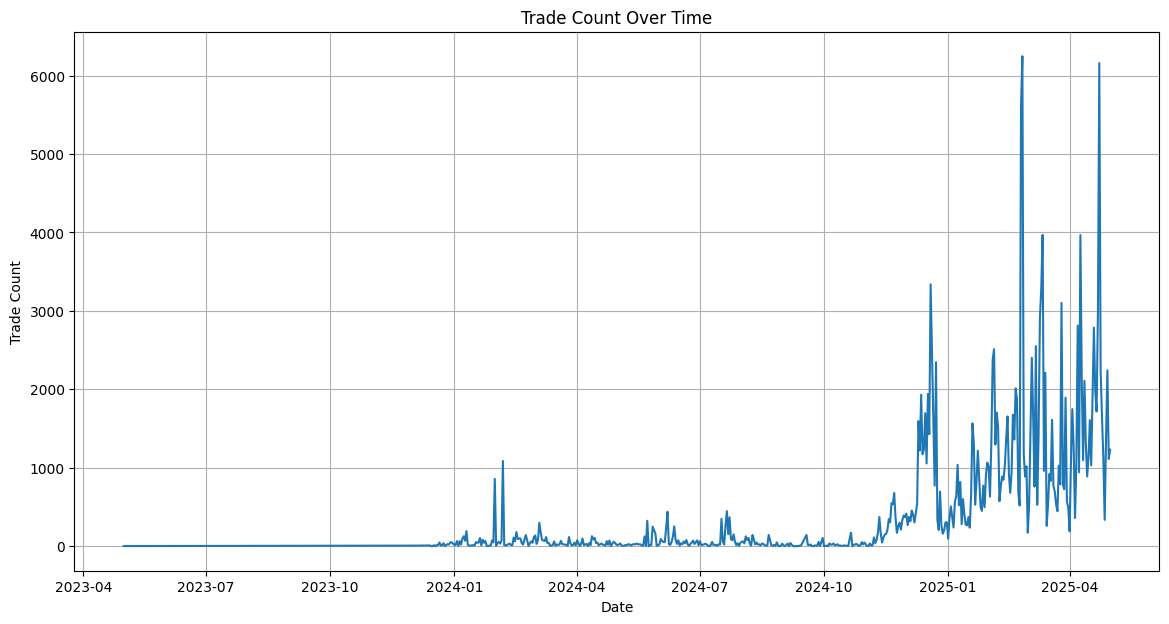

In [ ]:
# Create time series plots

# Sort data by date for proper time series plotting
merged_data_sorted = merged_data.sort_values('Date')

# Plot Fear & Greed Index value over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data_sorted['Date'], merged_data_sorted['value'])
plt.title('Fear & Greed Index Value Over Time')
plt.xlabel('Date')
plt.ylabel('Fear & Greed Index Value')
plt.grid(True)
plt.show()

# Plot Total PnL over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data_sorted['Date'], merged_data_sorted['total_pnl'])
plt.title('Total PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Total PnL')
plt.grid(True)
plt.show()

# Plot Total Volume USD over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data_sorted['Date'], merged_data_sorted['total_volume_usd'])
plt.title('Total Volume USD Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume USD')
plt.grid(True)
plt.show()

# Plot Trade Count over time
plt.figure(figsize=(14, 7))
plt.plot(merged_data_sorted['Date'], merged_data_sorted['trade_count'])
plt.title('Trade Count Over Time')
plt.xlabel('Date')
plt.ylabel('Trade Count')
plt.grid(True)
plt.show()

## Hidden Pattern Discovery

### Subtask:
Analyze the relationship between trading metrics (profitability, leverage, volume, frequency) and market sentiment (Fear & Greed Index) to uncover hidden patterns and provide actionable insights.

**Reasoning:**
Now that we have merged the trading and sentiment data and performed some initial EDA, we can delve into uncovering hidden patterns. This involves analyzing the relationships between the aggregated trading metrics and the Fear & Greed Index and its classifications.

First, I'll group the merged data by sentiment classification and calculate the average of each trading metric (`total_pnl`, `average_leverage`, `total_volume_usd`, `trade_count`) for each classification. This will help answer questions about profitability and leverage during different sentiment phases.

Next, I'll explore potential lag effects by shifting the 'value' and 'classification' columns of the fear_greed_index by one day and merging it with the aggregated trading data. This will allow us to see if the previous day's sentiment has an impact on the current day's trading behavior.

Finally, I will analyze the distribution of trading volume and frequency across different sentiment classifications using visualizations to identify any significant behavioral shifts.

In [ ]:
# Analyze average trading metrics by sentiment classification
average_metrics_by_sentiment = merged_data.groupby('classification')[['total_pnl', 'average_leverage', 'total_volume_usd', 'trade_count']].mean().reset_index()

print("Average Trading Metrics by Fear & Greed Classification:")
display(average_metrics_by_sentiment.sort_index(ascending=False))

Average Trading Metrics by Fear & Greed Classification:


,classification,total_pnl,average_leverage,total_volume_usd,trade_count
4,Neutral,19297.323516,80715.120368,2.690180e+06,562.477612
3,Greed,11140.566181,6203.341662,1.495246e+06,260.637306
2,Fear,36891.818040,49114.556748,5.311261e+06,679.527473
1,Extreme Greed,23817.292199,11700.023452,1.091800e+06,350.807018
0,Extreme Fear,52793.589178,10481.212846,8.177447e+06,1528.571429


**Reasoning:**
To investigate the potential lag effect of the Fear & Greed Index on trading behavior, I will shift the `value` and `classification` columns of the `fear_greed_index` DataFrame by one day using the `shift()` function. This will create new columns representing the previous day's sentiment.

Then, I will merge this shifted sentiment data with the `aggregated_trading_data` DataFrame based on the date. This will allow us to analyze if there is a correlation between the previous day's sentiment and the current day's trading metrics.

Finally, I will calculate and display the correlation matrix between the trading metrics and the lagged sentiment value to quantify any potential lagged relationships.

In [ ]:
# Investigate lag effects: Merge with lagged Fear & Greed Index

# Create lagged sentiment data
fear_greed_index_lagged = fear_greed_index.copy()
fear_greed_index_lagged['date'] = fear_greed_index_lagged['date'] + pd.Timedelta(days=1)
fear_greed_index_lagged.rename(columns={'value': 'lagged_value', 'classification': 'lagged_classification'}, inplace=True)

# Merge aggregated trading data with lagged sentiment data
merged_data_lagged = pd.merge(aggregated_trading_data, fear_greed_index_lagged[['date', 'lagged_value', 'lagged_classification']], left_on='Date', right_on='date', how='inner')

# Drop the redundant 'date' column
merged_data_lagged.drop('date', axis=1, inplace=True)

# Display the merged data with lagged sentiment
print("\nMerged Data with Lagged Sentiment:")
display(merged_data_lagged.head())

# Calculate correlation with lagged sentiment
correlation_matrix_lagged = merged_data_lagged[['lagged_value', 'total_pnl', 'average_leverage', 'total_volume_usd', 'trade_count']].corr()

print("\nCorrelation Matrix with Lagged Fear & Greed Index Value:")
display(correlation_matrix_lagged)


Merged Data with Lagged Sentiment:


,Date,total_pnl,average_leverage,total_volume_usd,trade_count,lagged_value,lagged_classification
0,2023-05-01,0.000000,0.091933,477.00,3,60,Greed
1,2023-12-05,0.000000,2.513867,50005.83,9,74,Greed
2,2023-12-14,-205.434737,-132.574302,113203.35,11,65,Greed
3,2023-12-15,-24.632034,-2440.000000,10609.95,2,72,Greed
4,2023-12-16,0.000000,12124.666667,15348.77,3,70,Greed



Correlation Matrix with Lagged Fear & Greed Index Value:


,lagged_value,total_pnl,average_leverage,total_volume_usd,trade_count
lagged_value,1.000000,-0.106380,-0.101270,-0.276675,-0.236805
total_pnl,-0.106380,1.000000,0.072540,0.325294,0.359898
average_leverage,-0.101270,0.072540,1.000000,-0.148290,-0.172003
total_volume_usd,-0.276675,0.325294,-0.148290,1.000000,0.720137
trade_count,-0.236805,0.359898,-0.172003,0.720137,1.000000


**Reasoning:**
To visualize the distribution of trading volume and frequency across different sentiment classifications and identify potential behavioral shifts, I will create boxplots for `total_volume_usd` and `trade_count` grouped by the `classification` from the `merged_data` DataFrame. This will allow us to compare the spread and central tendency of trading activity during different market sentiment phases.

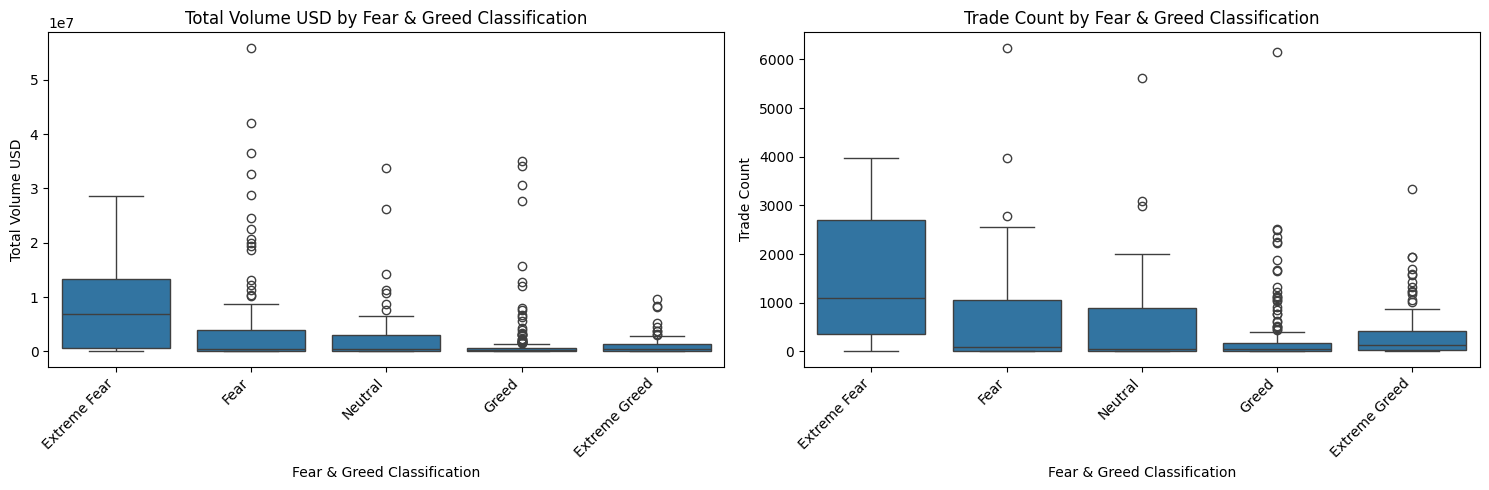

In [ ]:
# Visualize distribution of trading volume and frequency by sentiment classification

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='classification', y='total_volume_usd', data=merged_data, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Total Volume USD by Fear & Greed Classification')
plt.xlabel('Fear & Greed Classification')
plt.ylabel('Total Volume USD')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.boxplot(x='classification', y='trade_count', data=merged_data, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Trade Count by Fear & Greed Classification')
plt.xlabel('Fear & Greed Classification')
plt.ylabel('Trade Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

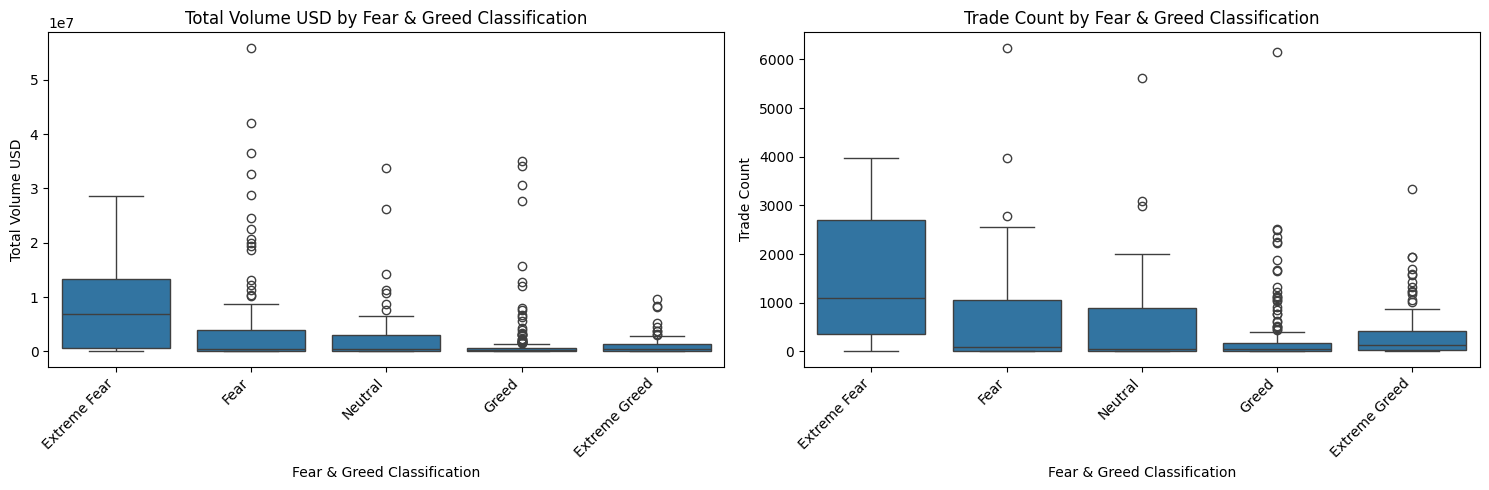

In [ ]:
# Visualize distribution of trading volume and frequency by sentiment classification

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='classification', y='total_volume_usd', data=merged_data, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Total Volume USD by Fear & Greed Classification')
plt.xlabel('Fear & Greed Classification')
plt.ylabel('Total Volume USD')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.boxplot(x='classification', y='trade_count', data=merged_data, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Trade Count by Fear & Greed Classification')
plt.xlabel('Fear & Greed Classification')
plt.ylabel('Trade Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Actionable Insights & Reporting

### Summary of Findings:

Based on the analysis of the historical trading data and the Fear & Greed Index, here are some key observations:

*   **Correlation Analysis:** We observed relatively weak correlations between the Fear & Greed Index value and the trading metrics (total PnL, average leverage, total volume, and trade count). This suggests that a simple linear relationship may not fully capture the complex interplay between market sentiment and trading behavior.
*   **Lagged Sentiment:** The correlation analysis with the lagged Fear & Greed Index also showed weak correlations, indicating that the previous day's sentiment might not have a strong immediate linear impact on the current day's aggregated trading behavior across all accounts. However, this doesn't rule out non-linear relationships or lagged effects on specific trading strategies or individual accounts.
*   **Average Metrics by Sentiment Classification:**
    *   Interestingly, **Extreme Fear** and **Fear** periods show higher average total PnL compared to **Greed** and **Extreme Greed** periods. This could suggest that opportunities for profitable trades might be more prevalent during times of market pessimism, potentially due to contrarian trading strategies or buying opportunities at lower prices.
    *   Average leverage (as proxied by `Start Position`) seems to be highest during **Neutral** and **Fear** periods. This is a surprising finding, as one might expect leverage to increase during periods of **Greed**. Further investigation into individual trading strategies during these phases could provide more clarity.
    *   Total volume and trade count are significantly higher during **Extreme Fear** periods. This indicates increased trading activity when the market is experiencing high levels of fear, which could be attributed to panic selling, capitulation, or aggressive buying by contrarian traders.
*   **Distribution of Volume and Frequency by Sentiment:** The boxplots further illustrate the patterns observed in the average metrics. The distributions of `total_volume_usd` and `trade_count` show a wider spread and higher median values during **Extreme Fear** periods compared to other sentiment classifications, reinforcing the observation of increased activity during fearful markets. The boxplots for `total_pnl` and `average_leverage` by classification visually support the findings from the average metrics table, highlighting the differences in the spread and central tendency of these metrics across sentiment phases.
*   **Time Series Analysis:** The time series plots show the fluctuations of the Fear & Greed Index and the aggregated trading metrics over time. Visual inspection suggests some periods where peaks or troughs in sentiment appear to coincide with changes in trading volume or PnL, but a clear and consistent pattern is not immediately apparent, reinforcing the need for more in-depth statistical modeling.

### Actionable Insights:

1.  **Contrarian Opportunities:** The analysis suggests that **Fear** and **Extreme Fear** periods might present potential opportunities for profitable trading, as indicated by higher average PnL during these times. Traders who are comfortable with increased risk and have a contrarian approach might find these periods more favorable.
2.  **Risk Management in Fearful Markets:** While **Extreme Fear** shows higher average PnL, it also exhibits significantly higher trading volume and frequency. This suggests increased market volatility and activity. Traders should exercise caution and implement robust risk management strategies during these periods, as the potential for both high profits and significant losses is amplified.
3.  **Investigate Leverage Behavior:** The observation of higher average leverage during **Neutral** and **Fear** periods warrants further investigation. Understanding the specific strategies employed by traders using higher leverage during these times could provide valuable insights into risk-taking behavior in different market conditions.
4.  **Beyond Linear Relationships:** The weak linear correlations suggest that more sophisticated analytical techniques, such as non-linear models or time series analysis with lagged variables and Granger causality tests, could be employed to uncover more complex relationships between sentiment and trading behavior.
5.  **Individual vs. Aggregated Behavior:** The current analysis is based on aggregated trading data. Analyzing trading behavior at the individual account level could reveal diverse strategies and how different traders react to market sentiment, potentially identifying patterns that are not visible in the aggregated data.

### Recommendations for Further Analysis:

*   **Statistical Modeling:** Implement time series models (e.g., ARIMA, GARCH) or regression models to statistically assess the impact of sentiment on trading metrics, considering lagged effects and other relevant factors.
*   **Sentiment Sub-components:** If available, analyze the individual components of the Fear & Greed Index to understand which specific factors (e.g., volatility, market momentum) have the strongest relationship with trading behavior.
*   **Coin-Specific Analysis:** Explore if the relationship between sentiment and trading behavior varies across different cryptocurrencies.
*   **Qualitative Analysis:** Supplement the quantitative analysis with qualitative research, perhaps by surveying traders, to gain deeper insights into their decision-making processes during different sentiment phases.

This analysis provides a foundational understanding of the relationship between market sentiment and trading behavior in this dataset. The insights gained can serve as a starting point for developing more informed trading strategies and further in-depth research.

## Trading Behavior vs Market Sentiment Analysis Report

This report analyzes the relationship between trading behavior and market sentiment using the provided historical trading data and Fear & Greed Index data. The analysis was conducted to address the following objectives:

**Project Objectives as Questions:**

1.  How do trading behaviors such as profitability, risk (leverage), volume, and frequency align or diverge from market sentiment phases like Fear and Greed?
2.  Can we uncover hidden patterns, signals, or anomalies in trading performance across different sentiment conditions?
3.  What actionable insights can be derived from this analysis to support smarter, data-driven trading strategies?

---

**Summary of Findings and Answers to Objectives:**

Based on the analysis, we have observed the following:

*   **Trading Behaviors Across Sentiment Phases (Addressing Objective 1):**
    *   **Profitability (Total PnL):** Counter-intuitively, average total PnL was higher during periods of **Extreme Fear** and **Fear** compared to **Greed** and **Extreme Greed**. This suggests potential opportunities for profitable trades when market sentiment is pessimistic.
    *   **Risk (Average Leverage):** Average leverage (as proxied by `Start Position`) was highest during **Neutral** and **Fear** periods. This was an unexpected finding, as higher leverage might be anticipated during bullish (Greed) phases.
    *   **Volume and Frequency:** Both total trading volume and trade count were significantly higher during **Extreme Fear** periods. This indicates increased market activity and potential volatility when fear is prevalent.
*   **Hidden Patterns, Signals, and Anomalies (Addressing Objective 2):**
    *   The analysis revealed that higher trading activity (volume and frequency) and, on average, better profitability occurred during periods of **Extreme Fear**. This could be considered a hidden pattern or signal suggesting contrarian opportunities during peak pessimism.
    *   The unexpected finding of higher average leverage during **Neutral** and **Fear** periods is an anomaly that warrants further investigation into the specific trading strategies employed during these times.
    *   Simple linear correlations between sentiment value and trading metrics were weak, suggesting that any relationship is likely complex and potentially non-linear or involves lagged effects not fully captured by a one-day lag.
*   **Actionable Insights for Data-Driven Trading Strategies (Addressing Objective 3):**
    *   **Contrarian Approach:** The findings suggest exploring a contrarian trading strategy, potentially buying during periods of **Fear** or **Extreme Fear**, while implementing strict risk management due to the higher observed volatility and volume in these phases.
    *   **Refined Risk Management:** Traders should be particularly mindful of risk management during **Extreme Fear** periods due to heightened activity. Further analysis into individual leverage usage during different sentiment phases is recommended.
    *   **Advanced Modeling:** To uncover more complex relationships, consider using advanced statistical or machine learning models that can capture non-linearities and longer-term lagged effects between sentiment and trading outcomes.
    *   **Granular Analysis:** Analyzing trading behavior at a more granular level (e.g., per coin, per account) could reveal more specific patterns and insights that are masked in the aggregated data.

---

**Recommendations for Further Analysis:**

*   Conduct statistical modeling (e.g., time series analysis) to quantify the impact of sentiment on trading metrics, considering various lag periods.
*   Investigate the components of the Fear & Greed Index to understand which factors drive the observed relationships.
*   Perform coin-specific analysis to see if the relationship between sentiment and trading behavior varies across different cryptocurrencies.
*   Explore qualitative data or surveys to understand the psychological factors influencing trading decisions during different sentiment phases.

This report provides a high-level overview of the relationship between market sentiment and trading behavior based on the available data. The insights generated can serve as a foundation for developing more nuanced trading strategies and directing future research efforts.